The purpose of this Jupyter notebook is to create the two Pareto front images in Figure 3 [here](https://arxiv.org/pdf/1903.01332.pdf).

Certain parts of this notebook are hardcoded specifically for those two examples, and certain features of the plot may not show up correctly if those examples are changed.

# Choose example number

In [1]:
example = 1
# example = 2

## Import Packages

In [2]:
## Packages
import numpy as np
import matplotlib.pyplot as plt
import os

## Plotting defaults
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

## Load Data

In [3]:
## Choose the filename corresponding to the example
if (example == 1):
    name = 'noobstacle'
elif (example == 2):
    name = 'obstacle'
else:
    raise Exception('Invalid example selected. Pareto fronts are only computed for Examples 1 and 2.')

## Read from file
try:
    subgradients = np.fromfile('../output/' + name + 'PF', np.dtype('f8'))
except:
    raise Exception('Error reading file. Did you run the C++ code first?')
    
## The C++ code actually computes the subgradients of -G(lambda)
## To recover the partial costs, we must take the negative of these.
J_1 = -subgradients[::2]
J_2 = -subgradients[1::2]

In [4]:
## Figures will be saved to Ex1/... or Ex2/...
## This code creates this directory if it does not already exist
write_directory = 'Ex' + str(example)
if not os.path.exists(write_directory):
    os.makedirs(write_directory)

## Plot the Pareto front

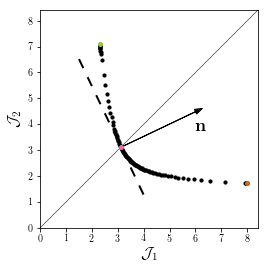

In [5]:
%matplotlib inline

## Plot Pareto front
plt.close()
fig, ax = plt.subplots()
ax.set_xlim(left=0, right=8.4)
ax.set_ylim(bottom=0, top=8.4)
ax.set_xticks(np.arange(0, 8.2, 1))
ax.set_yticks(np.arange(0, 8.2, 1))
ax.set_xlabel(r'$\mathcal{J}_1$', fontsize=16)
ax.set_ylabel(r'$\mathcal{J}_2$', fontsize=16)
plt.scatter(J_1, J_2, s=10, color='k', zorder=2)

## Plot central ray
rr = range(0, 20, 2)
ax.plot(rr, rr, color='k', linewidth=0.5, zorder=1)

## Example-specific plotting
if (example == 1):
    ## Label endpoints
    plt.scatter(J_1[0], J_2[0], s=15, color='chocolate', zorder=2)
    plt.scatter(J_1[100],J_2[100], s=15, color='yellowgreen', zorder=2)

    ## Lambda-optimal point
    opt = 67
    plt.scatter(J_1[opt], J_2[opt], s=15, color='#FF69B4', zorder=3)
    
    ## Tangent line to PF at optimal point
    k1 = (J_2[opt+1] - J_2[opt-1])/(J_1[opt+1] - J_1[opt-1])
    b1 =  J_2[opt] - k1 * J_1[opt]
    x1 = 1.5
    x2 = 4
    ax.plot([x1,x2], [x1*k1+b1, x2*k1+b1], '--', color='k', dashes=(5,5), linewidth=2, zorder=1)
    
    ## Arrow in direction of Lambda^*
    k2 = -1.0 / k1
    b2 = J_2[opt] - k2 * J_1[opt]
    ax.arrow(J_1[opt], J_2[opt], 6-J_1[opt], 6*k2+b2-J_2[opt], head_width=0.2, head_length=0.3,color='k')
    ax.text(6, 3.7, r'$\textbf{n}$', fontsize=18)

else:
    ## Point where J_1 = J_2
    G = 2.83
    plt.scatter(G, G, s=15, color='#FF69B4', zorder=3)
    
    ## Lambda-optimal points
    opt1 = 47
    opt2 = 48
    plt.scatter(J_1[opt1], J_2[opt1], s=15, color='gold', zorder=3)
    plt.scatter(J_1[opt2], J_2[opt2], s=15, color='cyan', zorder=3)
    
    ## Dashed line between Lambda-optimal points
    k1 = (J_2[opt2] - J_2[opt1])/(J_1[opt2] - J_1[opt1])
    b1 =  J_2[opt2] - k1 * J_1[opt2]
    ax.plot([J_1[opt1], J_1[opt2]], [J_2[opt1], J_2[opt2]], '--', color='k', dashes=(5, 5), linewidth=2, zorder=1)
    
    ## Arrow in direction of Lambda^*
    k2 = -1.0 / k1
    b2 = G - k2 * G
    ax.arrow(G, G, 5-G, 5*k2+b2-G, head_width=0.2, head_length=0.3, color='k')
    ax.text(5.2, 4.5, r'$\textbf{n}$', fontsize=20)
    
## Display figure and save to file
ax.set_aspect(1)
plt.savefig(write_directory + '/' + name + '_pf.png', dpi = 500, bbox_inches='tight')
plt.show()